## Improving the Performance of the MNIST Network

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4,3)  # default figure size: 4x3 inches

### Prepare the Data

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [3]:
# return images of type float32 in the range 0-1
def load_normalized_mnist_data():
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    # scale the pixel values to the range 0-1
    train_images = train_images.astype('float32') / 255
    test_images = test_images.astype('float32') / 255
    return (train_images, train_labels), (test_images, test_labels)

In [4]:
(train_images,train_labels), (test_images,test_labels) = load_normalized_mnist_data()

In [5]:
# create the one-hot target vectors
train_targets, test_targets = to_categorical(train_labels), to_categorical(test_labels)

In [6]:
def show_random_images():
    images = test_images
    labels = test_labels
    plt.figure(figsize=(12,12))  # (width, height) in inches
    rows, columns = 5, 6
    for i in range(1, columns*rows+1):
        n = random.randrange(len(images))
        plt.subplot(rows, columns, i)
        plt.title(f"{labels[n]}")
        plt.axis('off')
        plt.imshow(images[n], cmap='gray')

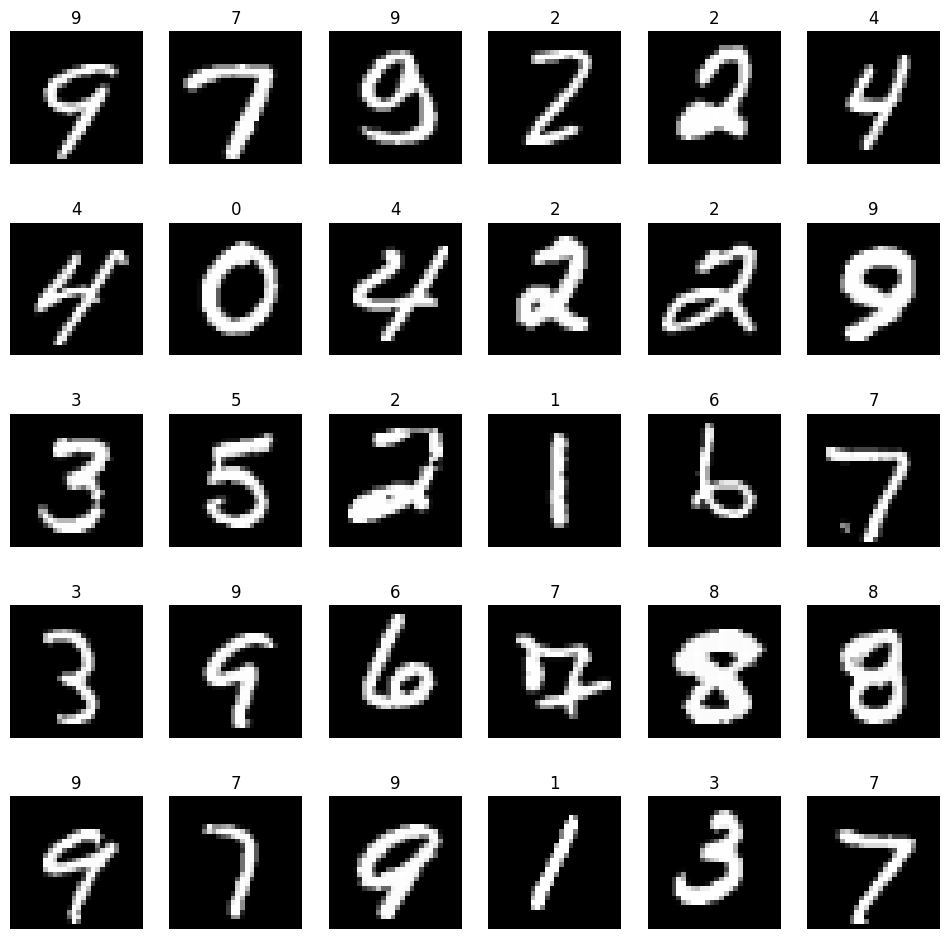

In [7]:
show_random_images()

### Build the Classification Network

<img src="http://science.slc.edu/jmarshall/bioai/images/mnist-network-with-flatten.png" width="55%">

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

In [9]:
def build_network():
    network = Sequential()
    network.add(Flatten(input_shape=(28,28)))
    network.add(Dense(30, activation='sigmoid', name='hidden'))
    network.add(Dense(10, activation='sigmoid', name='output'))
    network.compile(loss='mean_squared_error',
                    optimizer=SGD(learning_rate=0.01, momentum=0.9), # defaults: 0.01, 0
                    metrics=['accuracy'])
    return network

In [10]:
network = build_network()

2023-04-06 18:30:44.215364: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 30)                23550     
_________________________________________________________________
output (Dense)               (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


### Train and Evaluate the Network

In [12]:
history = network.fit(train_images, train_targets, epochs=30);

2023-04-06 18:30:44.325123: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
1875/1875 [==============================] - 2s 762us/step - loss: 0.0901 - accuracy: 0.3383
Epoch 2/30
1875/1875 [==============================] - 1s 748us/step - loss: 0.0773 - accuracy: 0.5463
Epoch 3/30
1875/1875 [==============================] - 1s 729us/step - loss: 0.0655 - accuracy: 0.6346
Epoch 4/30
1875/1875 [==============================] - 1s 748us/step - loss: 0.0557 - accuracy: 0.7146
Epoch 5/30
1875/1875 [==============================] - 1s 769us/step - loss: 0.0484 - accuracy: 0.7640
Epoch 6/30
1875/1875 [==============================] - 1s 736us/step - loss: 0.0429 - accuracy: 0.7992
Epoch 7/30
1875/1875 [==============================] - 1s 719us/step - loss: 0.0386 - accuracy: 0.8235
Epoch 8/30
1875/1875 [==============================] - 1s 741us/step - loss: 0.0353 - accuracy: 0.8422
Epoch 9/30
1875/1875 [==============================] - 1s 715us/step - loss: 0.0326 - accuracy: 0.8554
Epoch 10/30
1875/1875 [==============================] - 1s 731u

In [13]:
network.evaluate(train_images, train_targets)

1875/1875 [==============================] - 1s 630us/step - loss: 0.0174 - accuracy: 0.9078


[0.017413873225450516, 0.9077666401863098]

In [14]:
network.evaluate(test_images, test_targets)

313/313 [==============================] - 0s 994us/step - loss: 0.0168 - accuracy: 0.9134


[0.01681559532880783, 0.9133999943733215]

In [15]:
def plot_history(history):
    loss_values = history.history['loss']
    accuracy_values = history.history['accuracy']
    epoch_nums = range(1, len(loss_values)+1)
    plt.figure(figsize=(12,4)) # width, height in inches
    plt.subplot(1, 2, 1)
    plt.plot(epoch_nums, loss_values, 'r')
    plt.title("Training loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.subplot(1, 2, 2)
    plt.plot(epoch_nums, accuracy_values, 'b')
    plt.title("Training accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.show()

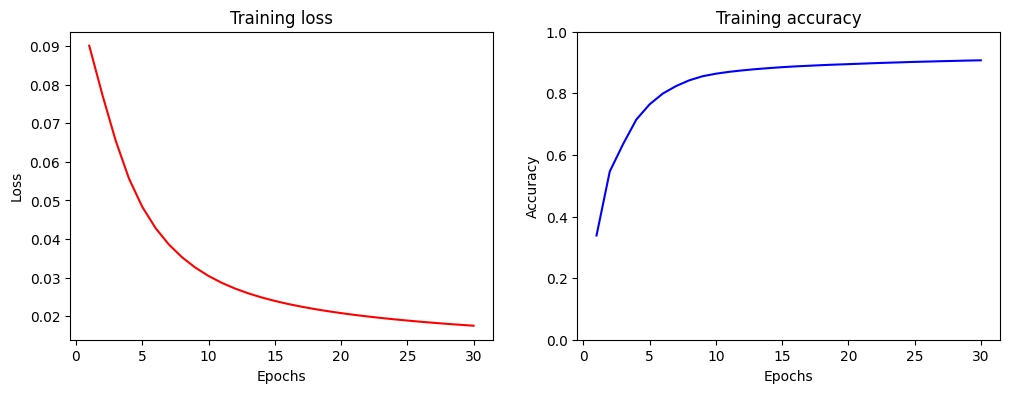

In [16]:
plot_history(history)

In [17]:
def show_wrong_images():
    outputs = network.predict(test_images)
    predictions = [np.argmax(output) for output in outputs]
    wrong = [i for i in range(10000) if predictions[i] != test_labels[i]]
    print(f"Misclassified {len(wrong)} test images out of {len(test_images)}")
    plt.figure(figsize=(12,12))  # (width, height) in inches
    rows, columns = 5, 6
    for i in range(1, columns*rows+1):
        w = random.choice(wrong)
        img = test_images[w]
        correct_label = test_labels[w]
        prediction = predictions[w]
        plt.subplot(rows, columns, i)
        plt.title(f'"{prediction}"  (correct: {correct_label})')
        plt.axis('off')
        plt.imshow(img, cmap='gray')

Misclassified 866 test images out of 10000


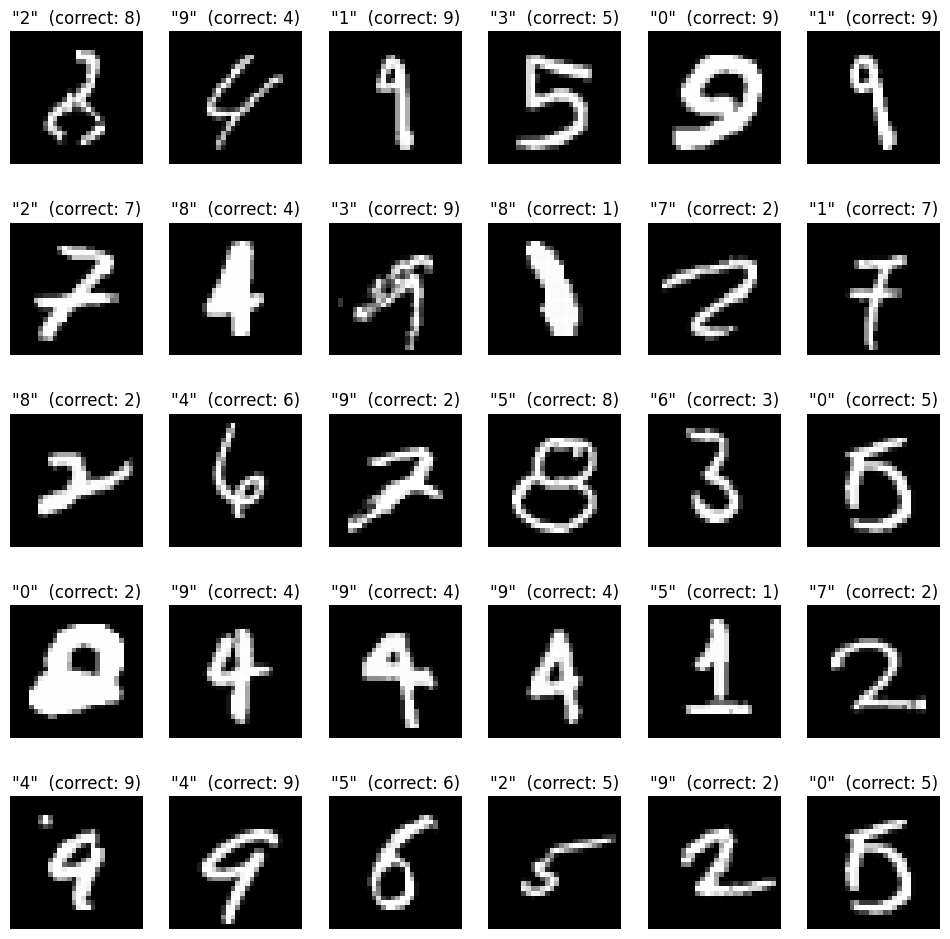

In [18]:
show_wrong_images()

### Activation Functions

#### Sigmoid

$\sigma(x) = \dfrac{1}{1 + e^{-x}}$

In [19]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [20]:
[sigmoid(x) for x in [1, 2, -3, -4, 5]]

[0.7310585786300049,
 0.8807970779778823,
 0.04742587317756678,
 0.01798620996209156,
 0.9933071490757153]

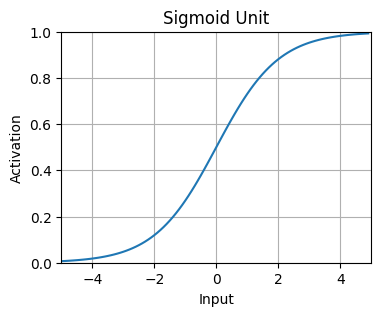

In [21]:
x_values = np.arange(-5, 5, 0.1)
plt.plot(x_values, [sigmoid(x) for x in x_values])
plt.xlim(-5, 5)
plt.ylim(0, 1)
plt.title("Sigmoid Unit")
plt.xlabel("Input")
plt.ylabel("Activation")
plt.grid()
plt.show()

#### Linear

Linear($x$) = $x$

In [22]:
def linear(x):
    return x

In [23]:
[linear(x) for x in [1, 2, -3, -4, 5]]

[1, 2, -3, -4, 5]

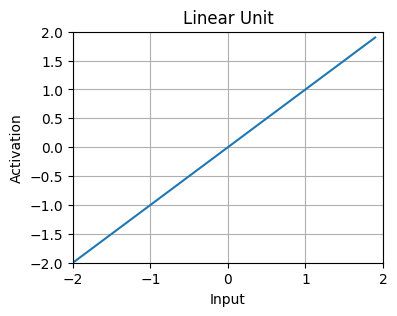

In [24]:
x_values = np.arange(-2, 2, 0.1)
plt.plot(x_values, [linear(x) for x in x_values])
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title("Linear Unit")
plt.xlabel("Input")
plt.ylabel("Activation")
plt.grid()
plt.show()

#### ReLU (Rectified Linear Unit)

ReLU($x$) = $max(x, 0)$

In [25]:
def ReLU(x):
    return max(x, 0)

In [26]:
[ReLU(x) for x in [1, 2, -3, -4, 5]]

[1, 2, 0, 0, 5]

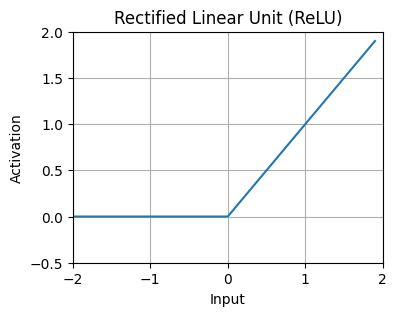

In [27]:
x_values = np.arange(-2, 2, 0.1)
plt.plot(x_values, [ReLU(x) for x in x_values])
plt.xlim(-2, 2)
plt.ylim(-0.5, 2)
plt.title("Rectified Linear Unit (ReLU)")
plt.xlabel("Input")
plt.ylabel("Activation")
plt.grid()
plt.show()

#### Softmax

$ \mathbf{x} = [x_1, x_2, x_3, \ldots , x_n]$

Softmax($\mathbf{x}$) $= {\large \dfrac{e^{x_i}}{{\LARGE \Sigma_{i}} ~ e^{x_i} }}$

In [28]:
def softmax(x_values):
    powers = [math.exp(x) for x in x_values]
    total = sum(powers)
    return [ex/total for ex in powers]

In [29]:
softmax([1,1,1,1,1])

[0.2, 0.2, 0.2, 0.2, 0.2]

In [30]:
sum(softmax([1,1,1,1,1]))

1.0

In [31]:
softmax([1, 2, -3, -4, 5])

[0.01714046175426964,
 0.04659260571802841,
 0.0003139385078773619,
 0.00011549152284012033,
 0.9358375024969845]

In [32]:
sum (softmax([1, 2, -3, -4, 5]))

1.0

In [33]:
softmax([6,5,5,5])

[0.4753668864186717,
 0.17487770452710943,
 0.17487770452710943,
 0.17487770452710943]

In [34]:
sum(softmax([6,5,5,5]))

1.0

The softmax output values always sum to 1.0, so the output can be interpreted as a **probability distribution**.  The name "softmax" is short for "soft argmax".  The greater the difference between the maximum value in the input vector and the other values, the more closely the output of softmax approximates a one-hot vector.

In [35]:
softmax([30,10,7,100,40,25,3,9])

[3.975449735908647e-31,
 8.194012623990515e-40,
 4.0795586671775593e-41,
 1.0,
 8.75651076269652e-27,
 2.678636961808078e-33,
 7.471972337342989e-43,
 3.0144087850653746e-40]

In [36]:
sum(softmax([30,10,7,100,40,25,3,9]))

1.0

[Interactive demo of softmax](http://neuralnetworksanddeeplearning.com/chap3.html#eqtn78) &nbsp; (from Michael Nielsen's book [*Neural Networks and Deep Learning*](http://neuralnetworksanddeeplearning.com))

### Types of Learning Tasks

#### Binary classification
* Example: Detecting sunglasses: yes / no
* Single output unit
* Output-layer activation function: <font color="blue">**sigmoid**</font>
* Example target values: 0, 1

#### Multiclass classification
* Example: Classifying poses: left / forward / up / right
* Multiple output units
* Output-layer activation function: <font color="blue">**softmax**</font>
* Example target vectors: [1, 0, 0, 0], &nbsp; [0, 0, 1, 0]

#### Regression (predicting arbitrary values)
* Example: Predicting housing prices
* Single or multiple output units
* Output-layer activation function: <font color="blue">**linear**</font>
* Example target values: 0.5, 3.8, -12.6, 516.2

### Loss Functions

#### Mean-squared-error (single output unit)

$C = \dfrac{1}{n}
\displaystyle\sum\limits_{\textit{patterns}} \,
\tfrac{1}{2}\,(y - a)^2$

Example:

<img src="http://science.slc.edu/jmarshall/bioai/images/dataset1.png" width="40%">

${\scriptsize = \dfrac{1}{8} \bigg( \frac{1}{2}(0 - 0.80)^2 + \frac{1}{2}(0 - 0.77)^2 +
\frac{1}{2}(0 - 0.82)^2 + \frac{1}{2}(1 - 0.60)^2 + \frac{1}{2}(0 - 0.53)^2 + \frac{1}{2}(1 - 0.59)^2 + \frac{1}{2}(1 - 0.73)^2 + \frac{1}{2}(1 - 0.81)^2 \bigg)}$

${\scriptsize = 0.164}$

#### Mean-squared-error (multiple output units)

$C = \dfrac{1}{n}
\displaystyle\sum\limits_{\textit{patterns}} \,
\displaystyle\sum\limits_{i} \,
\tfrac{1}{2}\,({y_i} - {a_i})^2$

Example:

<img src="http://science.slc.edu/jmarshall/bioai/images/dataset2.png" width="60%">

#### Mean-squared-error with sigmoid units can cause problems

Learning task: &nbsp; input $x$ **= 1** $\,\rightarrow\,$ output $y$ **= 0**

<img src="http://neuralnetworksanddeeplearning.com/images/tikz28.png" width="30%">

[Demo of learning with mean-squared-error](http://neuralnetworksanddeeplearning.com/chap3.html) &nbsp; (from Michael Nielsen's book [*Neural Networks and Deep Learning*](http://neuralnetworksanddeeplearning.com))

$\Delta w_{ij} = -\eta \dfrac{\partial C}{\partial w_{ij}}$

$\dfrac{\partial C}{\partial w_{ij}} = (a_i - y_i)\,a_i\,(1 - a_i)\,a_j~~~$ using the **mean-squared error** cost function $C$

$\dfrac{\partial C}{\partial w} = (a - y)\,a\,(1 - a)\,x~~~$ for the above example neuron with a single weight



The term $(a - y)$ represents the neuron's actual error, that is, how far off the neuron's output $a$ is from the correct answer $y$.  But when $a$ is close to 0 or close to 1, the term $a\,(1 - a)$ is close to 0, which makes the error term $(a - y)$ essentially irrelevant because it gets multiplied by a number close to 0.  Consequently, $\frac{\partial C}{\partial w}$ is close to 0, which makes the weight change $\Delta w$ close to 0, meaning that **learning is very slow!**

#### Binary cross-entropy (single output unit)

$C ~=~ -\dfrac{1}{n}
\displaystyle\sum\limits_{\textit{patterns}} \left[y \ln a + (1-y ) \ln (1-a) \right]$

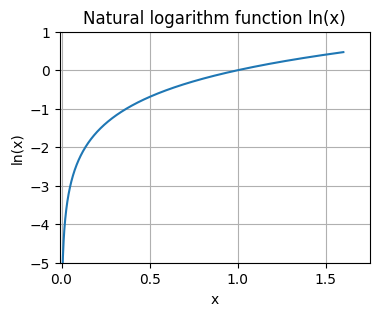

In [37]:
x_values = np.arange(0.005, 1.6, 0.001)
plt.plot(x_values, np.log(x_values))
plt.xlim(-0.01, 1.75)
plt.ylim(-5, 1)
plt.title("Natural logarithm function ln(x)")
plt.xlabel("x")
plt.ylabel("ln(x)")
plt.grid()
plt.show()

Example:

<img src="http://science.slc.edu/jmarshall/bioai/images/dataset1.png" width="40%">

${\scriptsize = -\dfrac{1}{8} \bigg( \ln(1 - 0.80) + \ln(1 - 0.77) + \ln(1 - 0.82) +
\ln(0.60) + \ln(1 - 0.53) + \ln(0.59) + \ln(0.73) + \ln(0.81) \bigg)}$

${\scriptsize = 0.889}$

#### Cross-entropy avoids learning slowdown with sigmoid output units

Learning task: &nbsp; input $x$ = **1** $\,\rightarrow\,$ output $y$ = **0**

<img src="http://neuralnetworksanddeeplearning.com/images/tikz28.png" width="30%">

[Demo of learning with cross-entropy](http://neuralnetworksanddeeplearning.com/chap3.html#eqtn62) &nbsp; (from Michael Nielsen's book [*Neural Networks and Deep Learning*](http://neuralnetworksanddeeplearning.com))

$\Delta w_{ij} = -\eta \dfrac{\partial C}{\partial w_{ij}}$

$\dfrac{\partial C}{\partial w_{ij}} = (a_i - y_i)\,a_j~~~$ using the **cross-entropy** cost function $C$

$\dfrac{\partial C}{\partial w} = (a - y)\,x~~~$ for the above example neuron with a single weight

This time, the error term $(a - y)$ influences $\frac{\partial C}{\partial w}$ **independently** of the value of the neuron's output $a$.  The larger the error, the larger the weight change $\Delta w$ will be.  So there is **no more learning slowdown** when the neuron's output is far off from the correct answer!

#### Categorical cross-entropy (multiple output units)

$C ~=~ -\dfrac{1}{n}
\displaystyle\sum\limits_{\textit{patterns}} \,
\displaystyle\sum\limits_{i} \,
\left[ {y_i} \ln {a_i} + (1-{y_i})\ln (1-{a_i}) \right]$

Problem type|Output-layer activation function|Loss function
--|:--:|--
Binary classification | sigmoid | binary_crossentropy
Multi-category classification | softmax | categorical_crossentropy
Predicting arbitrary values | linear | mean_squared_error
Predicting values between 0 and 1 | sigmoid | mean_squared_error *or* binary_crossentropy

### The Problem of Vanishing Gradients

#### Sigmoid Units in a Deep Network

$w_i$ = weight into the $i^{\text{th}}$ neuron

$b_i$ = bias of the $i^{\text{th}}$ neuron

$z_i$ = sum of inputs into the $i^{\text{th}}$ neuron = $w_i \cdot a_{i-1} + b_i$

$a_i$ = output activation of the $i^{\text{th}}$ neuron = $\sigma(z_i) = \dfrac{1}{1 + e^{-z_i}}$

<img src="http://science.slc.edu/jmarshall/bioai/images/simple-deep-network.png" width="55%">

Update rule for bias $b_1$: &nbsp;&nbsp; $\Delta b_1 = -\eta \dfrac{\partial C}{\partial b_1}$

$\dfrac{\partial C}{\partial b_1}$ is the influence of bias $b_1$ on the total cost $C$, which we can express as a "cascade of influences" using the chain rule:

$\dfrac{\partial C}{\partial b_1} =
\dfrac{\partial z_1}{\partial b_1} \times
\dfrac{\partial a_1}{\partial z_1} \times
\dfrac{\partial z_2}{\partial a_1} \times
\dfrac{\partial a_2}{\partial z_2} \times
\dfrac{\partial z_3}{\partial a_2} \times
\dfrac{\partial a_3}{\partial z_3} \times
\dfrac{\partial z_4}{\partial a_3} \times
\dfrac{\partial a_4}{\partial z_4} \times
\dfrac{\partial C}{\partial a_4}
$

$~~~~~~~= 1 ~\times \sigma'(z_1) \times w_2 \times \sigma'(z_2) \times w_3 \times \sigma'(z_3)
\times w_4 \times \sigma'(z_4) \times \dfrac{\partial C}{\partial a_4}$

where $\sigma'(z_i)$ is the derivative of the sigmoid function $\dfrac{1}{1 + e^{-z_i}}$.

The derivative $\sigma'(z_i)$ equals $a_i(1 - a_i)$, as we saw when we went through the [derivation of backpropagation](http://science.slc.edu/jmarshall/bioai/notes/backprop-algorithm-derivation.pdf) in class. Consequently, hidden units with activations close to 0 or 1 will make this factor small, and multiplying many such factors together will **dramatically reduce the gradient values** in earlier layers of the network, which means that **learning will be very slow**, regardless of which cost function we use.

#### Rectified Linear Units

One proposed solution that has been empirically shown to help reduce the problem of vanishing gradients in practice is to have the hidden layers use the **ReLU activation function** instead of the sigmoid function.

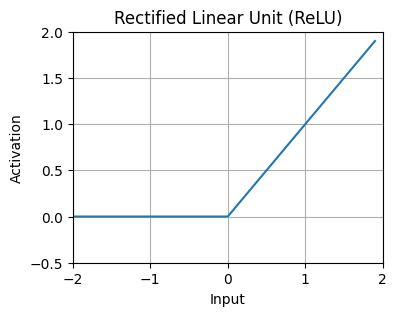

In [38]:
x_values = np.arange(-2, 2, 0.1)
plt.plot(x_values, [ReLU(x) for x in x_values])
plt.xlim(-2, 2)
plt.ylim(-0.5, 2)
plt.title("Rectified Linear Unit (ReLU)")
plt.xlabel("Input")
plt.ylabel("Activation")
plt.grid()
plt.show()

The derivative of the ReLU function is simply 1 when its input is greater than zero, which avoids the problematic factors $a_i\,(1 - a_i)$ that arise from the derivative of the sigmoid function.  Of course, if the input to the ReLU unit is negative, then the derivative is precisely zero, and the gradient information will vanish completely.  But as long as the input remains positive, larger values will not cause the gradient to diminish at all.  

### The Improved Version of the Network

In [39]:
def build_network():
    network = Sequential()
    network.add(Flatten(input_shape=(28,28)))
    network.add(Dense(30, activation='relu', name='hidden'))
    network.add(Dense(10, activation='softmax', name='output'))
    network.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
    return network

In [40]:
network = build_network()

In [41]:
train_images.dtype, train_images.min(), train_images.max()

(dtype('float32'), 0.0, 1.0)

In [42]:
history = network.fit(train_images, train_targets, epochs=30);

Epoch 1/30
1875/1875 [==============================] - 2s 925us/step - loss: 0.3591 - accuracy: 0.9013
Epoch 2/30
1875/1875 [==============================] - 2s 918us/step - loss: 0.1901 - accuracy: 0.9459
Epoch 3/30
1875/1875 [==============================] - 2s 923us/step - loss: 0.1489 - accuracy: 0.9574
Epoch 4/30
1875/1875 [==============================] - 2s 925us/step - loss: 0.1251 - accuracy: 0.9633
Epoch 5/30
1875/1875 [==============================] - 2s 932us/step - loss: 0.1099 - accuracy: 0.9681
Epoch 6/30
1875/1875 [==============================] - 2s 921us/step - loss: 0.0984 - accuracy: 0.9707
Epoch 7/30
1875/1875 [==============================] - 2s 950us/step - loss: 0.0887 - accuracy: 0.9736
Epoch 8/30
1875/1875 [==============================] - 2s 923us/step - loss: 0.0816 - accuracy: 0.9756
Epoch 9/30
1875/1875 [==============================] - 2s 920us/step - loss: 0.0759 - accuracy: 0.9769
Epoch 10/30
1875/1875 [==============================] - 2s 935u

In [43]:
network.evaluate(train_images, train_targets)

1875/1875 [==============================] - 1s 655us/step - loss: 0.0224 - accuracy: 0.9934


[0.0223871860653162, 0.9933666586875916]

In [44]:
network.evaluate(test_images, test_targets)

313/313 [==============================] - 0s 1ms/step - loss: 0.1521 - accuracy: 0.9683


[0.15208254754543304, 0.9682999849319458]

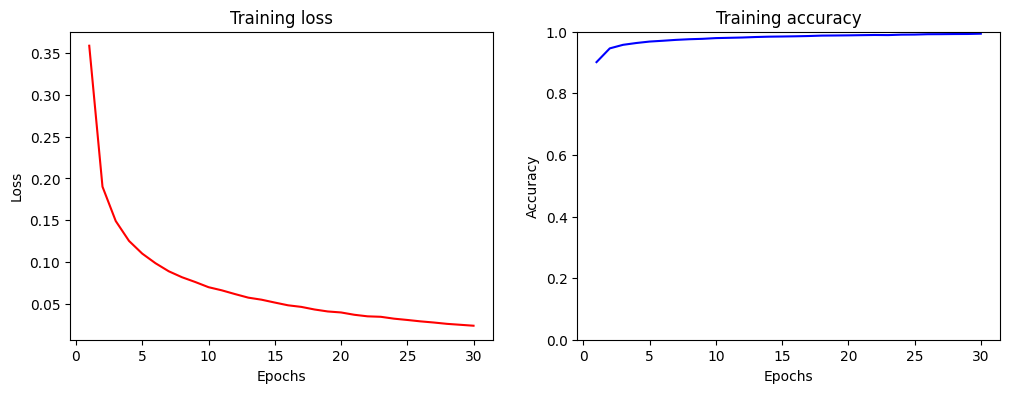

In [45]:
plot_history(history)